<a href="https://colab.research.google.com/github/hitanshu5/Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jenil Shah 60009220058
D1-1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv("Tennis.csv")
df=df.drop(columns="Day")
df

,Outlook,Temp,Humidity,Wind,Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [ ]:
def entropy(df,outcomes):
  counts=df.value_counts()
  p=len(df)
  ans=0
  for i in outcomes:
    if i in counts:
      ans+=-(counts[i]/p)*math.log2(counts[i]/p)
  return ans
outcomes=df["Tennis"].unique()
print(entropy(df["Tennis"],df["Tennis"].unique()))

0.9402859586706311


In [ ]:
def gain(df,column,prediction,entropy_init,outcomes):
  entropysum=0
  n=len(df.index)
  for j in df[column].unique():
    e=entropy(df[df[column]==j][prediction],outcomes)
    entropysum+=e*len(df[df[column]==j])/n
  return entropy_init-entropysum
gain(df,"Wind","Tennis",entropy(df["Tennis"],outcomes),outcomes)

0.04812703040826949

In [ ]:
def true(df,outcomes):
  e=entropy(df,outcomes)
  if (e==1 or e==0):
      return True
  return False
print(true(df["Tennis"],outcomes))

False


In [ ]:
def findsplit(df,prediction,outcomes):
  if (true(df[prediction],outcomes)):
    return df[prediction][0]
  columnnames=df.columns
  columns=columnnames[0:-1]
  size=len(df.index)
  maxgain=0
  split_col=columns[0]
  e=entropy(df[prediction],outcomes)
  for i in columns:
    g=gain(df,i,prediction,e,outcomes)
    if (maxgain<g):
      split_col=i
      maxgain=g
  return split_col
print(findsplit(df,"Tennis",outcomes))

Outlook


In [ ]:
class Node:
  def __init__(self):
      Node.children={}
      Node.child=[]
      Node.col=None
class Tree:
    def __init__(self,df,pred):
        Tree.outcomes=df[pred].unique()
        Tree.root=self.grow(df,pred)
    def gain(self,df,feature,pred,entropy_init):
        entropysum=0
        n=len(df.index)
        for j in df[feature].unique():
            X=df[df[feature]==j]
            e=self.entropy(X[pred])
            entropysum+=e*len(X)/n
        return entropy_init-entropysum
    def entropy(self,y):
        counts=y.value_counts()
        p=len(y)
        ans=0
        for i in self.outcomes:
            if i in counts:
                ans+=-(counts[i]/p)*math.log2(counts[i]/p)
        return ans
    def true(self,y):
        e=self.entropy(y)
        if (e==1 or e==0):
            return True
        return False
    def findsplit(self,df,pred):
        if (self.true(df[pred])):
            for i in df[pred]:
                return i
        columns=df.columns[:-1]
        size=len(df)
        maxgain=0
        split_col=columns[0]
        e=self.entropy(df[pred])
        for i in columns:
            g=self.gain(df,i,pred,e)
            if (maxgain<g):
                split_col=i
                maxgain=g
        return split_col
    def grow(self,df,pred):
        n=Node()
        col=self.findsplit(df,pred)
        if (col not in df.columns):
            return col
        dict={}
        n.col=col
        for i in df[col].unique():
            X=df[df[col]==i]
            dict[i]=self.grow(X,pred)
        n.children=dict
        return n
    def predict(self,df):
        predictions=[]
        for index,row in df.iterrows():
            n=self.root
            while (n and type(n)!=str):
                cur=row[n.col]
                n=n.children[cur]
            predictions.append(n)
        return predictions

In [ ]:
t=Tree(df,"Tennis")
d={'Outlook':['Rain'],'Temp':['Hot'],'Humidity':['Normal'],'Wind':['Weak']}
df1 = pd.DataFrame(d)
print(t.predict(df1))

['Yes']


{1: 'Iris-setosa', 2: 'Iris-setosa', 3: 'Iris-setosa', 4: 'Iris-setosa', 5: 'Iris-setosa', 6: 'Iris-setosa', 7: 'Iris-setosa', 8: 'Iris-setosa', 9: 'Iris-setosa', 10: 'Iris-setosa', 11: 'Iris-setosa', 12: 'Iris-setosa', 13: 'Iris-setosa', 14: 'Iris-setosa', 15: 'Iris-setosa', 16: 'Iris-setosa', 17: 'Iris-setosa', 18: 'Iris-setosa', 19: 'Iris-setosa', 20: 'Iris-setosa', 21: 'Iris-setosa', 22: 'Iris-setosa', 23: 'Iris-setosa', 24: 'Iris-setosa', 25: 'Iris-setosa', 26: 'Iris-setosa', 27: 'Iris-setosa', 28: 'Iris-setosa', 29: 'Iris-setosa', 30: 'Iris-setosa', 31: 'Iris-setosa', 32: 'Iris-setosa', 33: 'Iris-setosa', 34: 'Iris-setosa', 35: 'Iris-setosa', 36: 'Iris-setosa', 37: 'Iris-setosa', 38: 'Iris-setosa', 39: 'Iris-setosa', 40: 'Iris-setosa', 41: 'Iris-setosa', 42: 'Iris-setosa', 43: 'Iris-setosa', 44: 'Iris-setosa', 45: 'Iris-setosa', 46: 'Iris-setosa', 47: 'Iris-setosa', 48: 'Iris-setosa', 49: 'Iris-setosa', 50: 'Iris-setosa', 51: 'Iris-versicolor', 52: 'Iris-versicolor', 53: 'Iris-ve

In [ ]:
d={'a':Node(),'b':'a'}
print(d)

{'a': <__main__.Node object at 0x7dae66629300>, 'b': 'a'}


In [ ]:
df1=pd.read_csv("Iris.csv")
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df1=df1.drop(columns="Id")
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
colnames=["sepal_length","sepal_width","petal_length","petal_width","type"]
iris=pd.read_csv("Iris.csv",skiprows=1,names=colnames)
iris

,sepal_length,sepal_width,petal_length,petal_width,type
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
features=["sepal_length","sepal_width","petal_length","petal_width"]
X=iris[features]
y=iris.type

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)

In [ ]:
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9333333333333333


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six']=six

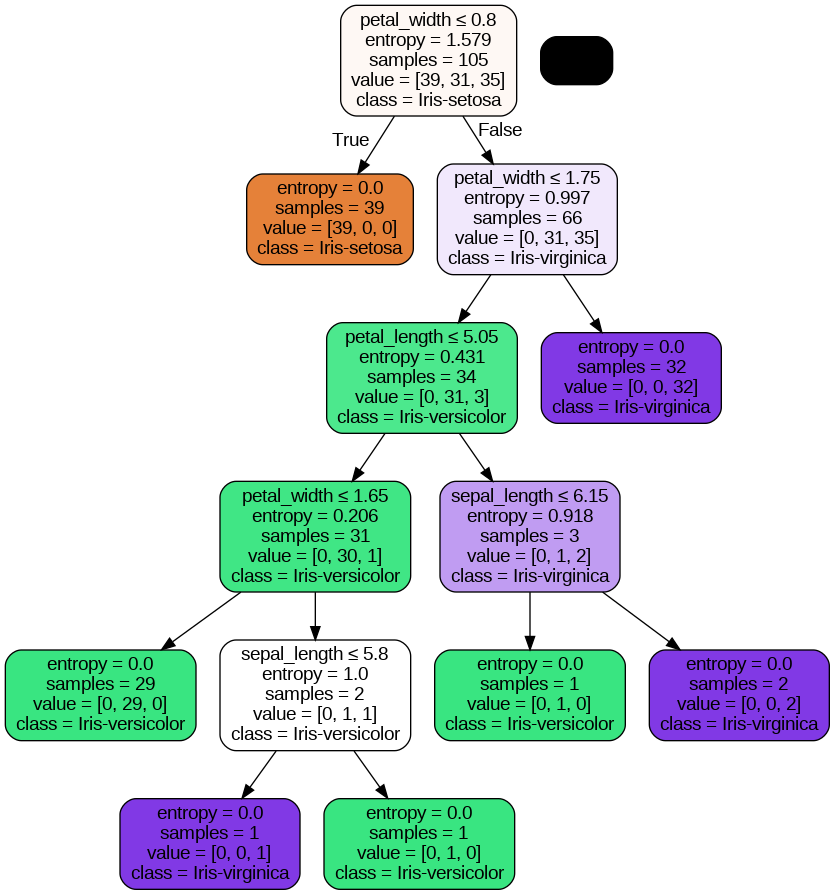

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot=StringIO()
export_graphviz(clf,out_file=dot,filled=True,rounded=True, special_characters=True, feature_names=features,class_names=iris.type.unique())
graph=pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

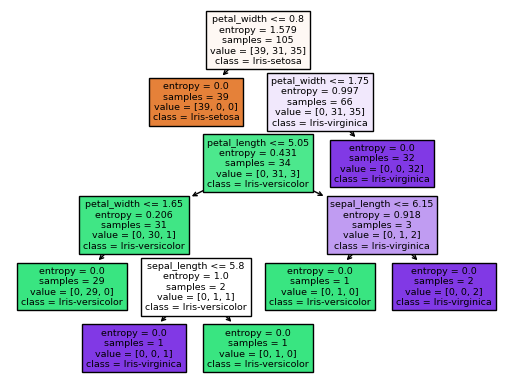

In [ ]:
from sklearn import tree
fig = plt.figure()
_ = tree.plot_tree(clf,
                   feature_names=features,
                   class_names=iris.type.unique(),
                   filled=True)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

In [ ]:
X,y=make_classification(n_samples=10**4,n_features=20,n_informative=5,n_redundant=15, random_state=58)
print(X.shape,y.shape)

(10000, 20) (10000,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ",acc(y_test,y_pred))


Accuracy:  0.8963333333333333


In [ ]:
train_accuracy=[]
test_accuracy=[]
X,y=make_classification(n_samples=10**4,n_features=20,n_informative=5,n_redundant=15, random_state=58)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)
for x in range(1,20):
    clf=DecisionTreeClassifier(max_depth=x,criterion="entropy")
    clf=clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    test_a=acc(y_test,y_pred)
    test_accuracy.append(test_a)
    y_pred=clf.predict(X_train)
    train_a=acc(y_train,y_pred)
    train_accuracy.append(train_a)
    print(x,train_a,test_a)

1 0.6755714285714286 0.6783333333333333
2 0.7358571428571429 0.733
3 0.8025714285714286 0.8006666666666666
4 0.824 0.816
5 0.8751428571428571 0.8543333333333333
6 0.8982857142857142 0.8803333333333333
7 0.913 0.8813333333333333
8 0.9294285714285714 0.892
9 0.945 0.9053333333333333
10 0.9567142857142857 0.9153333333333333
11 0.965 0.9096666666666666
12 0.9742857142857143 0.9056666666666666
13 0.9792857142857143 0.9066666666666666
14 0.9831428571428571 0.9066666666666666
15 0.987 0.9026666666666666
16 0.9895714285714285 0.9013333333333333
17 0.9915714285714285 0.9026666666666666
18 0.9928571428571429 0.9036666666666666
19 0.995 0.899


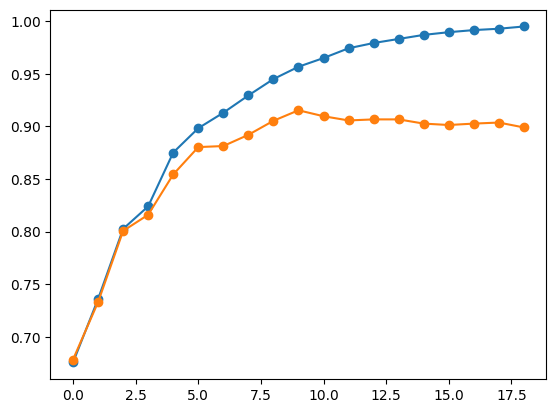

In [ ]:
plt.plot(train_accuracy,"-o")
plt.plot(test_accuracy,"-o")
plt.show()

In [ ]:
clf=DecisionTreeClassifier(max_depth=10,criterion="entropy")
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ",acc(y_test,y_pred))

Accuracy:  0.912


In [ ]:
cancer=pd.read_csv("Breast_cancer_data.csv")
cancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
features=["mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness"]
X=cancer[features]
y=cancer.diagnosis

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=58)
train_accuracy=[]
test_accuracy=[]
values=[i for i in range(1,10)]
for i in values:
    clf=DecisionTreeClassifier(max_depth=i)
    clf=clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    test_accuracy.append(acc(y_test,y_pred))
    y_pred=clf.predict(X_train)
    train_accuracy.append(acc(y_train,y_pred))

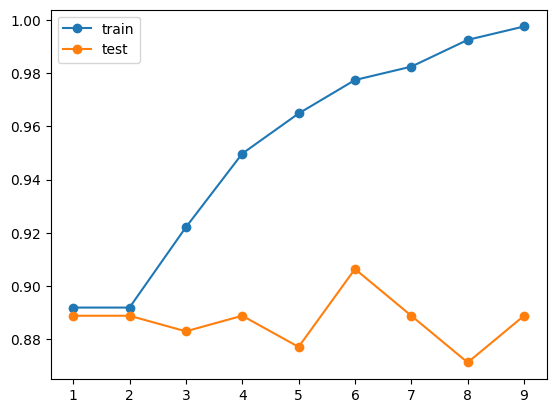

In [ ]:
plt.plot(values,train_accuracy,"-o",label="train")
plt.plot(values,test_accuracy,"-o",label="test")
plt.legend()
plt.show()

In [ ]:
clf=DecisionTreeClassifier(max_depth=6)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy: ",acc(y_test,y_pred))

Accuracy:  0.9064327485380117


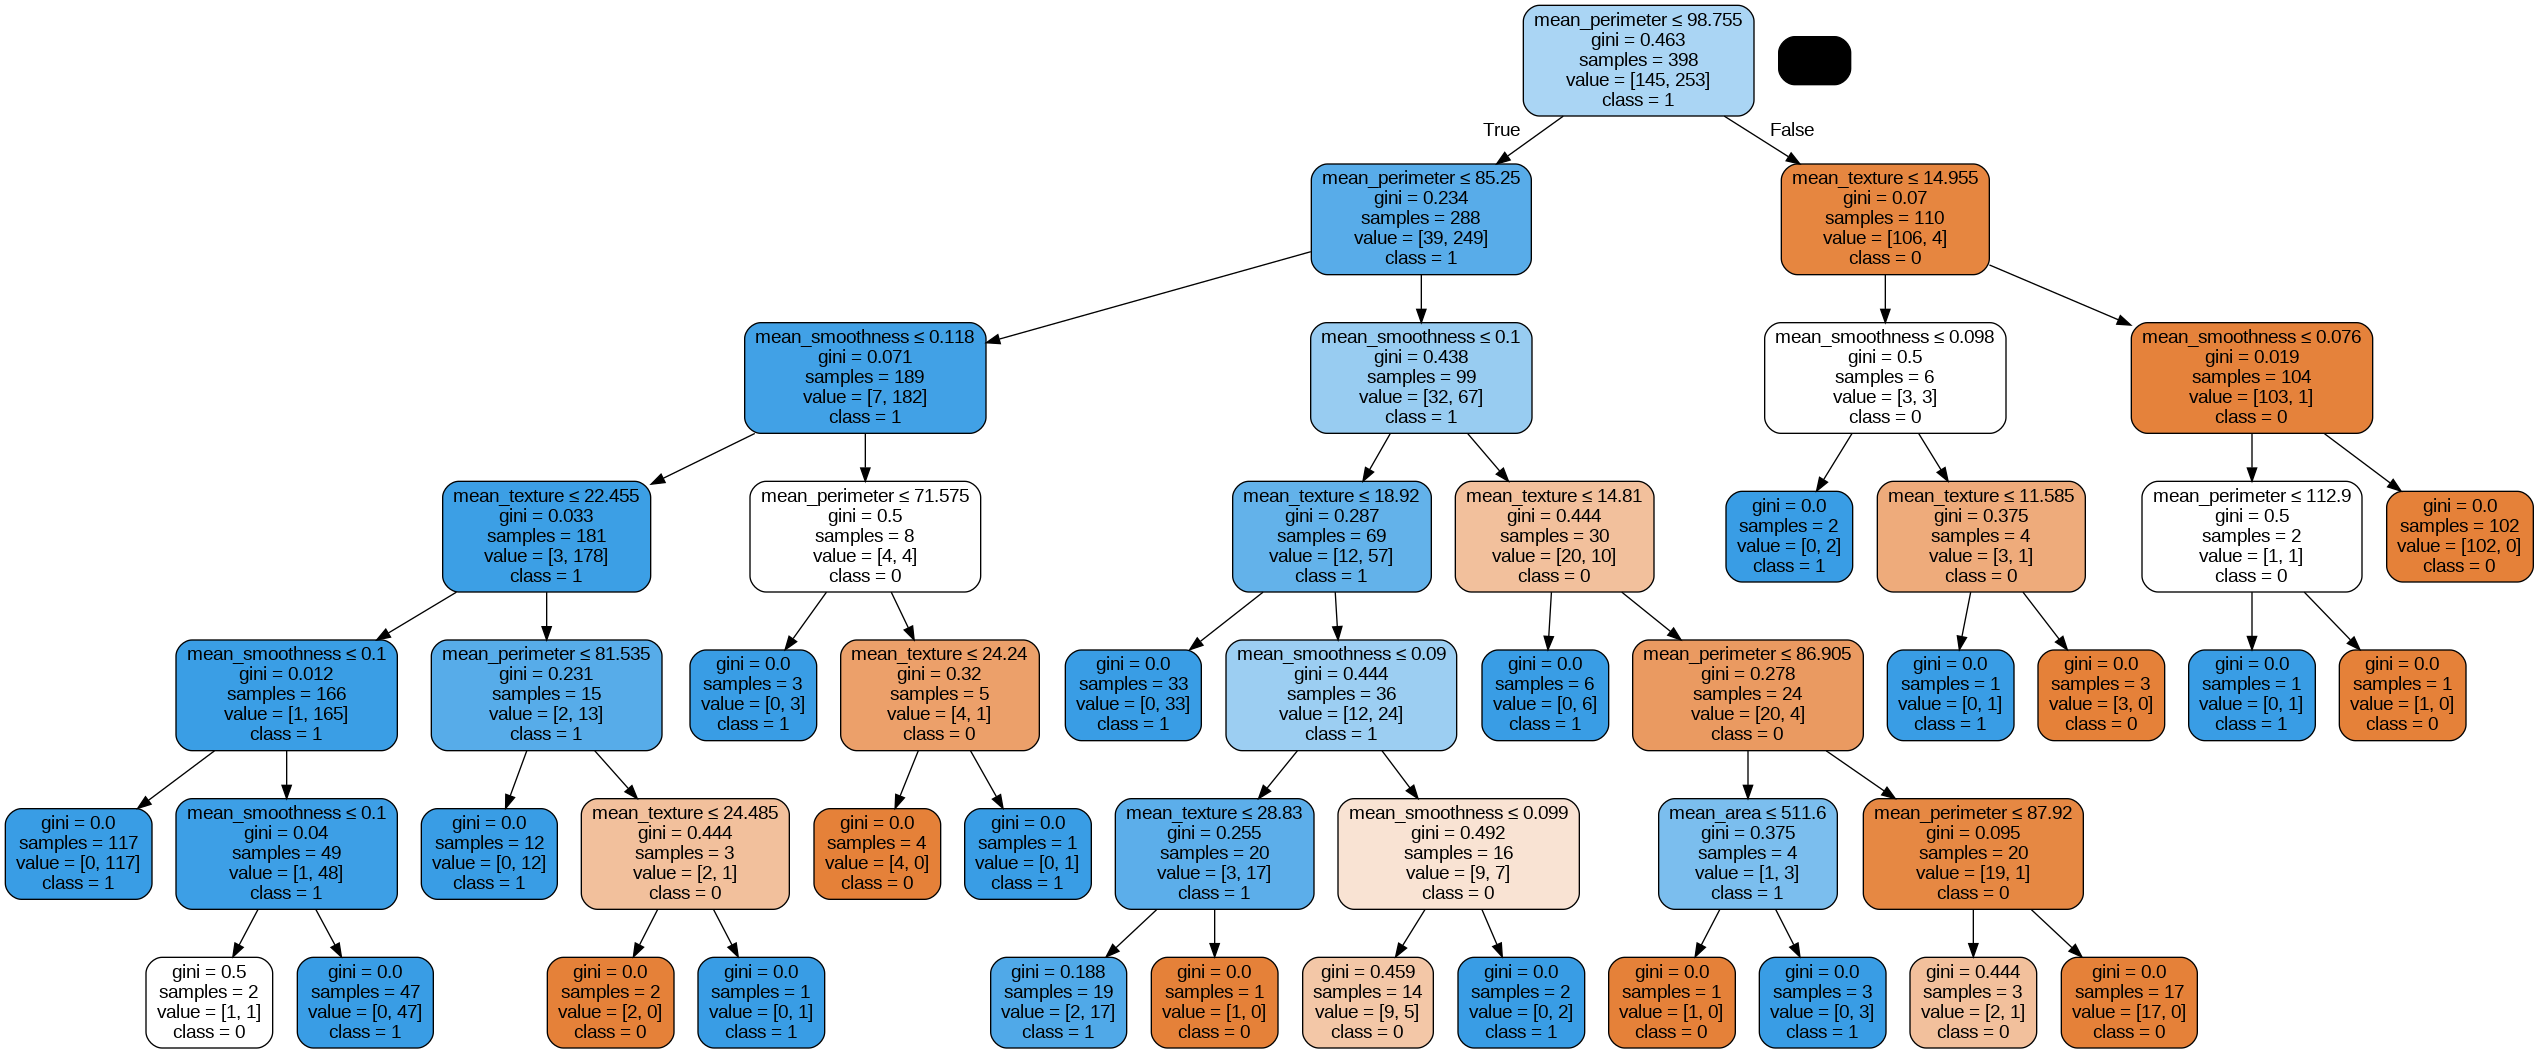

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
dot=StringIO()
export_graphviz(clf,out_file=dot,filled=True,rounded=True, special_characters=True, feature_names=features,class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())

In [ ]:
car=pd.read_csv("carprediction.csv")
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
print(car["Make"].unique())

['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']


In [ ]:
features=["Year","Engine HP","Engine Cylinders","Number of Doors","highway MPG","city mpg","Popularity"]
X=car[features]
y=car.MSRP
print(X.shape,y.shape)
car.dropna(inplace=True)
y.head()

(8084, 7) (8084,)


0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
train_accuracy=[]
test_accuracy=[]
values=[i for i in range(1,10)]
for i in values:
    reg=DecisionTreeRegressor(max_depth=i)
    reg=reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    test_accuracy.append(metrics.mean_squared_error(y_test,y_pred))
    y_pred=reg.predict(X_train)
    train_accuracy.append(metrics.mean_squared_error(y_train,y_pred))

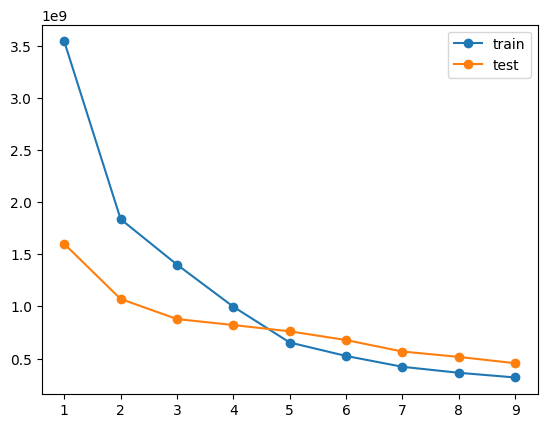

In [ ]:
plt.plot(values,train_accuracy,"-o",label="train")
plt.plot(values,test_accuracy,"-o",label="test")
plt.legend()
plt.show()